In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Inspecting songs from 2000 to 2023
# /!\ this dataset is missin loudness and tempo
top_100_songs = pd.read_csv('../../raw_data/top_100_from_2000_to_2023.csv', sep=';')

# Data Shape
print(top_100_songs.shape)

# Data head
top_100_songs.head()

(2385, 14)


,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,Flowers,Miley Cyrus,pop,2023,118,68,71,-4,3,65,200,6,7,98
1,Cupid - Twin Ver.,FIFTY FIFTY,k-pop girl group,2023,120,59,78,-8,35,73,174,44,3,97
2,BESO,ROSALÍA,pop,2023,95,64,77,-7,17,53,195,74,14,96
3,Boy's a liar Pt. 2,PinkPantheress,bronx drill,2023,133,81,70,-8,25,86,131,25,5,96
4,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,rap,2022,98,62,72,-6,8,17,222,42,5,96


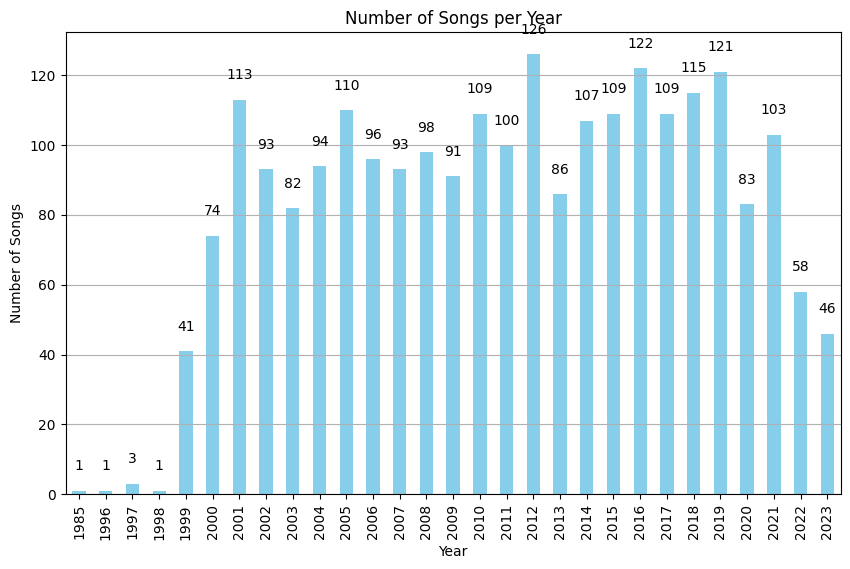

In [3]:
# plot number of songs per year with annotations
def plot_songs_per_year(df):
    songs_per_year = df['year'].value_counts().sort_index()
    
    plt.figure(figsize=(10, 6))
    ax = songs_per_year.plot(kind='bar', color='skyblue')
    plt.title('Number of Songs per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Songs')
    plt.grid(axis='y')
    
    # Add annotations on top of each bar
    for i, value in enumerate(songs_per_year):
        ax.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=10)
    
    plt.show()

plot_songs_per_year(top_100_songs)

In [4]:
# keep only the songs from years 2000 to 2022
top_100_songs = top_100_songs[(top_100_songs['year'] >= 2000) & (top_100_songs['year'] <= 2022)]
top_100_songs.reset_index(drop=True, inplace=True)

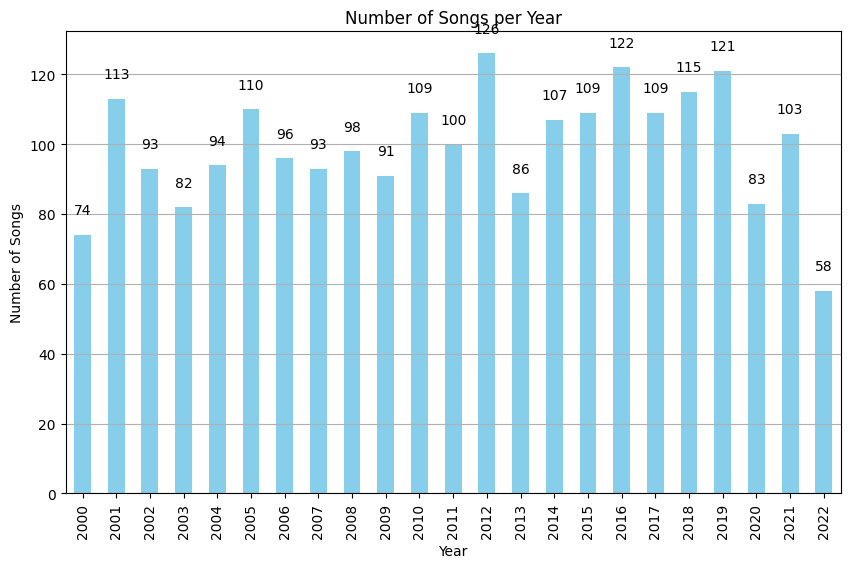

In [5]:
plot_songs_per_year(top_100_songs)

In [9]:
# i want to sort the df by year and then by popularity descending
def sort_songs_by_year_and_popularity(df):
    sorted_df = df.sort_values(by=['year', 'popularity'], ascending=[True, False])
    sorted_df.reset_index(drop=True, inplace=True)
    return sorted_df

sorted_top_100_songs = sort_songs_by_year_and_popularity(top_100_songs)
sorted_top_100_songs.head(20)

,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,Yellow,Coldplay,permanent wave,2000,173,66,43,-7,23,28,267,0,3,90
1,The Real Slim Shady,Eminem,detroit hip hop,2000,105,66,95,-4,5,76,284,3,6,89
2,In the End,Linkin Park,alternative metal,2000,105,86,56,-6,21,40,217,1,6,87
3,Stan,Eminem,detroit hip hop,2000,80,77,78,-4,52,51,404,4,24,85
4,Ms. Jackson,Outkast,atl hip hop,2000,95,81,84,-6,8,61,271,14,27,83
5,It's My Life,Bon Jovi,glam metal,2000,120,91,55,-4,35,54,224,3,5,82
6,Kryptonite,3 Doors Down,alternative metal,2000,99,87,55,-6,17,54,234,1,3,81
7,It Wasn't Me,Shaggy,dance pop,2000,95,61,85,-5,31,65,228,6,7,80
8,Oops!...I Did It Again,Britney Spears,dance pop,2000,95,83,75,-5,36,89,211,30,4,80
9,Dancing in the Moonlight,Toploader,british alternative rock,2000,119,86,63,-3,35,87,233,6,3,79


In [10]:
# take the top 50 songs for each year based on the highest popularity
def get_top_n_songs_per_year(df, n=50):
    top_n_songs = df.groupby('year').head(n)
    top_n_songs.reset_index(drop=True, inplace=True)
    return top_n_songs

final_top_50_songs = get_top_n_songs_per_year(sorted_top_100_songs, n=50)
final_top_50_songs.head(20)


,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,Yellow,Coldplay,permanent wave,2000,173,66,43,-7,23,28,267,0,3,90
1,The Real Slim Shady,Eminem,detroit hip hop,2000,105,66,95,-4,5,76,284,3,6,89
2,In the End,Linkin Park,alternative metal,2000,105,86,56,-6,21,40,217,1,6,87
3,Stan,Eminem,detroit hip hop,2000,80,77,78,-4,52,51,404,4,24,85
4,Ms. Jackson,Outkast,atl hip hop,2000,95,81,84,-6,8,61,271,14,27,83
5,It's My Life,Bon Jovi,glam metal,2000,120,91,55,-4,35,54,224,3,5,82
6,Kryptonite,3 Doors Down,alternative metal,2000,99,87,55,-6,17,54,234,1,3,81
7,It Wasn't Me,Shaggy,dance pop,2000,95,61,85,-5,31,65,228,6,7,80
8,Oops!...I Did It Again,Britney Spears,dance pop,2000,95,83,75,-5,36,89,211,30,4,80
9,Dancing in the Moonlight,Toploader,british alternative rock,2000,119,86,63,-3,35,87,233,6,3,79


In [11]:
final_top_50_songs.shape

(1150, 14)